<a href="https://colab.research.google.com/github/teejaz/AITensorFlow/blob/master/Stocks%20Predictons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPY vs. TSLA Regression coefficients: [ 1.84781905 -0.00372946]


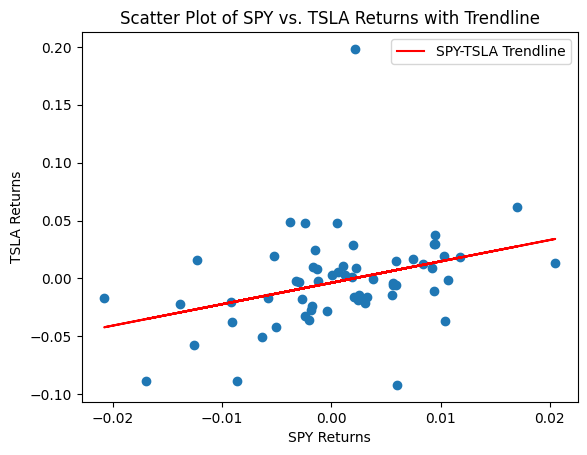

SPY Time vs. Close Regression coefficients: [  0.53458472 450.33822042]
Predicted SPY closing price at time 282: 601.0911110626696
TSLA Time vs. Close Regression coefficients: [6.67662494e-02 2.01650062e+02]
Predicted TSLA closing price at time 282: 220.4781439829589


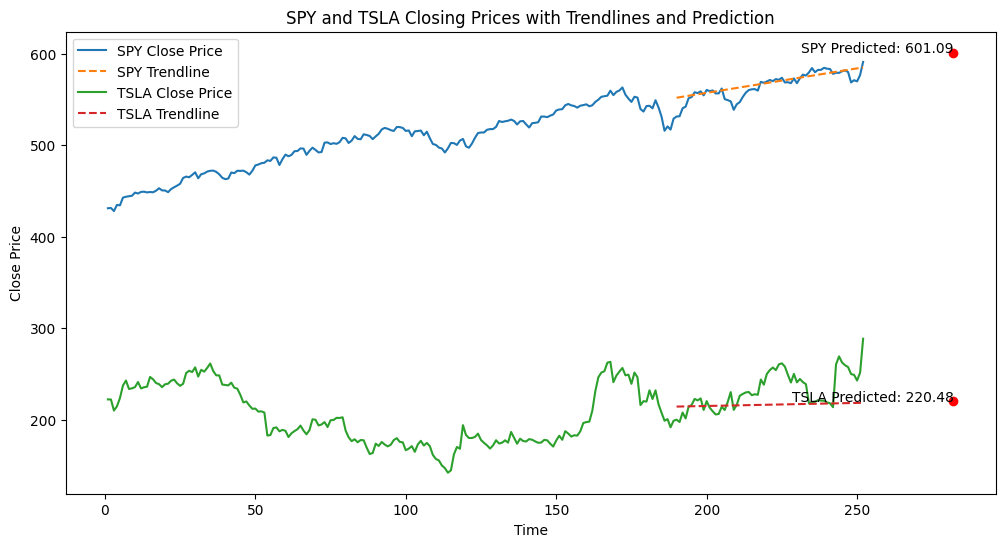

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

# Define the stocks list, with SPY and TSLA
stocks = ["SPY", "TSLA"]
data = {}

# Retrieve data and store closing prices
for stock in stocks:
    ticker = yf.Ticker(stock)
    data[stock] = ticker.history(period="1y")["Close"]

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Calculate daily log returns
returns = np.log(df).diff().dropna()

# Sample for regression and plotting
sample = returns.sample(60)

# Perform linear regression between SPY and TSLA returns
reg = np.polyfit(sample['SPY'], sample['TSLA'], deg=1)
print("SPY vs. TSLA Regression coefficients:", reg)

# Calculate trendline
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['TSLA'])
plt.plot(sample['SPY'], trend, 'r', label="SPY-TSLA Trendline")
plt.xlabel("SPY Returns")
plt.ylabel("TSLA Returns")
plt.title("Scatter Plot of SPY vs. TSLA Returns with Trendline")
plt.legend()
plt.show()

# Linear trend analysis on time vs. closing prices for SPY and TSLA
predictions = {}
plt.figure(figsize=(12, 6))

for stock in stocks:
    # Create a time index and perform linear regression for each stock
    df[stock + '_time'] = np.arange(1, len(df) + 1)
    reg = np.polyfit(df[stock + '_time'], df[stock], deg=1)
    trend = np.polyval(reg, df[stock + '_time'][-63:])
    print(f"{stock} Time vs. Close Regression coefficients:", reg)

    # Define a prediction function for each stock
    predict = np.poly1d(reg)
    future_time = len(df) + 30  # Example prediction for 30 days beyond current data
    predicted_price = predict(future_time)
    predictions[stock] = predicted_price
    print(f"Predicted {stock} closing price at time {future_time}:", predicted_price)

    # Plot the trend line and actual closing prices
    plt.plot(df[stock + '_time'], df[stock], label=f"{stock} Close Price")
    plt.plot(df[stock + '_time'][-63:], trend, '--', label=f"{stock} Trendline")

    # Add a prediction point on the plot
    plt.scatter(future_time, predicted_price, marker='o', color='red')
    plt.text(future_time, predicted_price, f"{stock} Predicted: {predicted_price:.2f}", ha='right')

# Display the graph
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("SPY and TSLA Closing Prices with Trendlines and Prediction")
plt.legend()
plt.show()


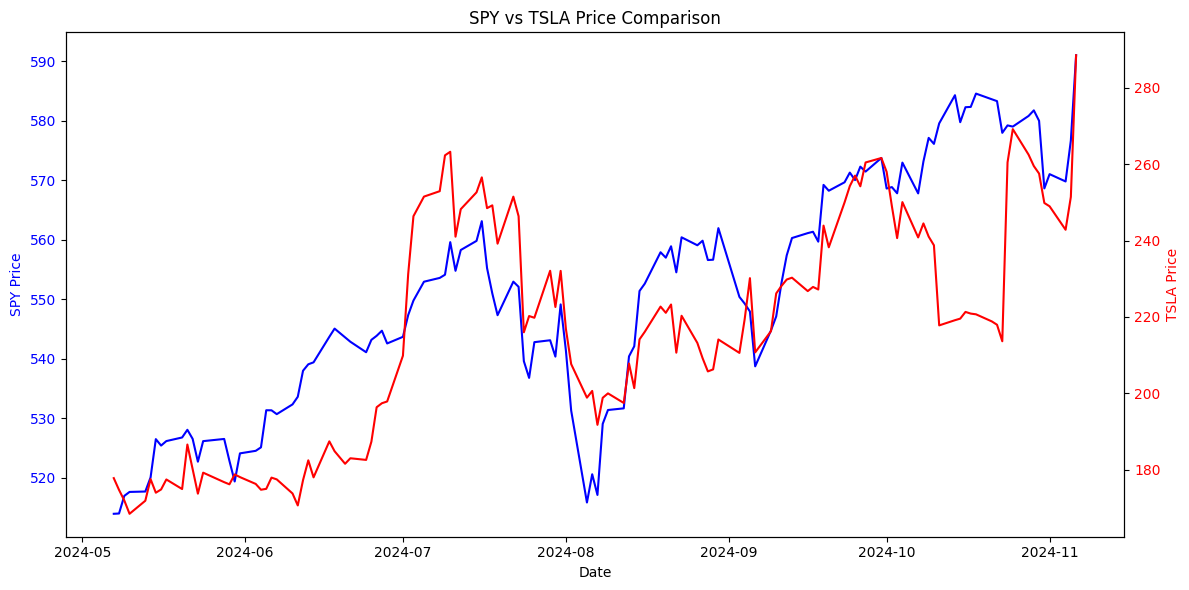

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch the data for SPY and TSLA
stocks = ["SPY", "TSLA"]
data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    data[stock] = ticker.history(period="6mo")["Close"]

df = pd.DataFrame(data)

# Plot SPY and TSLA with separate y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SPY on the primary y-axis
ax1.plot(df.index, df['SPY'], color="blue", label="SPY")
ax1.set_xlabel("Date")
ax1.set_ylabel("SPY Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis for TSLA
ax2 = ax1.twinx()
ax2.plot(df.index, df['TSLA'], color="red", label="TSLA")
ax2.set_ylabel("TSLA Price", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add a title and show the plot
plt.title("SPY vs TSLA Price Comparison")
fig.tight_layout()
plt.show()
